<a href="https://colab.research.google.com/github/IsraaAbdulNabi/Weather-Forecasting-Using-Machine-Learning-and-DeepLearning-Techniques-A-Case-Study-in-Jordan/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [1]:
import pandas as pd

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
from sklearn.externals import joblib
import pickle
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv("weather_data_24hr.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             14049 non-null  int64  
 1   date               14049 non-null  object 
 2   maxtempC           14049 non-null  int64  
 3   maxtempF           14049 non-null  int64  
 4   mintempC           14049 non-null  int64  
 5   mintempF           14049 non-null  int64  
 6   avgtempC           14049 non-null  int64  
 7   avgtempF           14049 non-null  int64  
 8   totalprecipMM      14049 non-null  float64
 9   totalprecipIn      14049 non-null  float64
 10  windspeedMiles     14049 non-null  int64  
 11  windspeedKmph      14049 non-null  int64  
 12  sunhour            14049 non-null  float64
 13  winddirdegree      14049 non-null  int64  
 14  winddir16point     14049 non-null  object 
 15  weatherCode        14049 non-null  int64  
 16  weatherIconUrl     140

In [5]:
#Remove any repatative representation of data in fahrenheit vs. celsius and Miles vs. Km
df= df.drop(['maxtempF', 'mintempF', 'avgtempF', 'totalprecipIn',
             'weatherCode', 'weatherIconUrl', 'visibilityMiles', 
             'HeatIndexF', 'DewPointF','WindChillF', 'WindGustMiles',
             'FeelsLikeF','windspeedMiles','weatherDesc','moon_phase','winddir16point'],axis=1)

In [6]:
df['sunrise'] = pd.to_datetime(df['sunrise'],format='%H:%M %p')
df['sunset'] = pd.to_datetime(df['sunset'],format='%H:%M %p')
df.drop(df[df['moonrise'] == 'No moonrise'].index, inplace = True)
df.drop(df[df['moonset'] == 'No moonset'].index, inplace = True)
df['moonrise'] = pd.to_datetime(df['moonrise'],format='%H:%M %p')
df['moonset'] = pd.to_datetime(df['moonset'],format='%H:%M %p')
#Convert datetime to numeric value so we can calculate the correlation between it and the tempreture
df['sunrise'] = df['sunrise'].apply(lambda x: x.value)
df['sunset'] = df['sunset'].apply(lambda x: x.value)
df['moonrise'] = df['moonrise'].apply(lambda x: x.value)
df['moonset'] = df['moonset'].apply(lambda x: x.value)

In [ ]:
df.corr()[['avgtempC']].sort_values('avgtempC')

,avgtempC
sunrise,-0.785076
pressureMB,-0.720054
pressureInches,-0.562877
cloudcover,-0.520572
humidity,-0.508600
totalprecipMM,-0.242086
WindGustKmph,-0.124032
windspeedKmph,-0.028400
moon_illumination,0.006676
moonrise,0.008897


[0.00972756 0.05374943 0.04454151 0.00677418 0.01772529 0.00879378
 0.0158153  0.02590338 0.00494905 0.01657404 0.00548185 0.01625189
 0.18237444 0.0214454  0.27476115 0.01751786 0.14050102 0.05499857
 0.0213196  0.01850742 0.01413433 0.01406342 0.01408951]


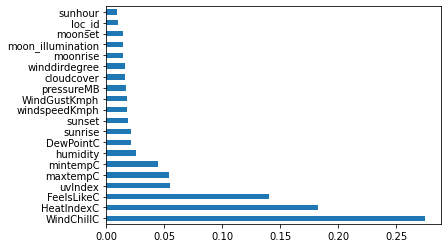

In [ ]:
import pandas as pd
import numpy as np
X = df.drop(['avgtempC','date'],axis=1)
y = df['avgtempC']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

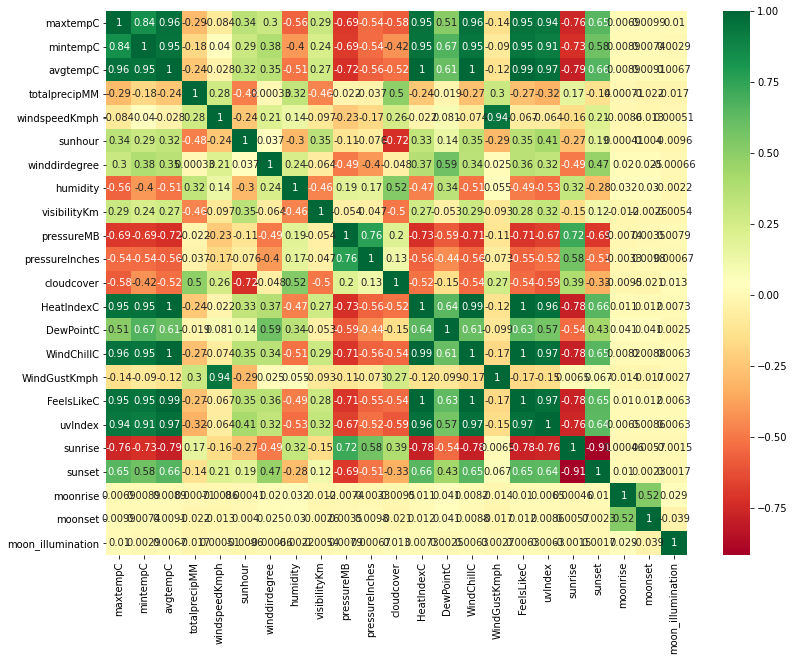

In [ ]:
import numpy as np
import seaborn as sns
X = df.drop(['loc_id','date'],axis=1)
y = df['avgtempC']
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,10))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

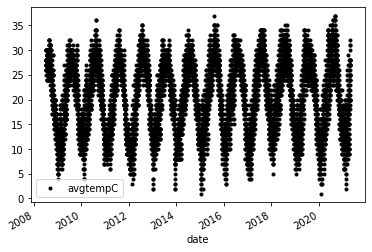

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv("weather_data_24hr.csv")
series['date'] = pd.to_datetime(series['date'],format='%Y-%m-%d')
series= series[['avgtempC','date']]
series.plot(x='date',y='avgtempC',style='k.')
pyplot.show()

In [7]:
df = df.drop(['sunrise','pressureMB','cloudcover','humidity',
               'totalprecipMM','WindGustKmph','windspeedKmph',
               'moon_illumination','moonrise','moonset','visibilityKm',
               'sunhour','winddirdegree','pressureInches'],axis=1)

In [8]:
amman_df= df.loc[df['loc_id'] == 1]
amman_df=amman_df.set_index('date')
amman_df = amman_df.drop(['loc_id'],axis=1)
irbid_df= df.loc[df['loc_id'] == 2]
irbid_df=irbid_df.set_index('date')
irbid_df = irbid_df.drop(['loc_id'],axis=1)
aqaba_df= df.loc[df['loc_id'] == 3]
aqaba_df=aqaba_df.set_index('date')
aqaba_df = aqaba_df.drop(['loc_id'],axis=1)

In [9]:
#set of selected features
features = ['avgtempC','WindChillC','HeatIndexC','FeelsLikeC','uvIndex',
            'sunset', 'DewPointC']

In [10]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [11]:
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(amman_df, feature, N)

In [ ]:
amman_df.head(10)

,maxtempC,mintempC,avgtempC,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,uvIndex,sunset,avgtempC_1,avgtempC_2,avgtempC_3,WindChillC_1,WindChillC_2,WindChillC_3,HeatIndexC_1,HeatIndexC_2,HeatIndexC_3,FeelsLikeC_1,FeelsLikeC_2,FeelsLikeC_3,uvIndex_1,uvIndex_2,uvIndex_3,sunset_1,sunset_2,sunset_3,DewPointC_1,DewPointC_2,DewPointC_3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-01,34,24,28,28,14,28,28,7,-2208960780000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-02,34,23,28,28,14,28,28,7,-2208960780000000000,28.0,NaN,NaN,28.0,NaN,NaN,28.0,NaN,NaN,28.0,NaN,NaN,7.0,NaN,NaN,-2.208961e+18,NaN,NaN,14.0,NaN,NaN
2008-07-03,34,23,27,28,14,27,28,7,-2208960840000000000,28.0,28.0,NaN,28.0,28.0,NaN,28.0,28.0,NaN,28.0,28.0,NaN,7.0,7.0,NaN,-2.208961e+18,-2.208961e+18,NaN,14.0,14.0,NaN
2008-07-04,34,21,27,27,15,27,27,7,-2208960840000000000,27.0,28.0,28.0,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,14.0,14.0,14.0
2008-07-05,34,23,28,28,13,28,28,7,-2208960840000000000,27.0,27.0,28.0,27.0,27.0,28.0,27.0,28.0,28.0,27.0,28.0,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,15.0,14.0,14.0
2008-07-06,33,21,26,27,16,26,27,7,-2208960840000000000,28.0,27.0,27.0,28.0,27.0,27.0,28.0,27.0,28.0,28.0,27.0,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,13.0,15.0,14.0
2008-07-07,33,20,27,27,16,27,27,7,-2208960840000000000,26.0,28.0,27.0,26.0,28.0,27.0,27.0,28.0,27.0,27.0,28.0,27.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,16.0,13.0,15.0
2008-07-08,34,23,28,28,14,28,28,7,-2208960840000000000,27.0,26.0,28.0,27.0,26.0,28.0,27.0,27.0,28.0,27.0,27.0,28.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,16.0,16.0,13.0
2008-07-09,35,23,28,28,13,28,28,7,-2208960900000000000,28.0,27.0,26.0,28.0,27.0,26.0,28.0,27.0,27.0,28.0,27.0,27.0,7.0,7.0,7.0,-2.208961e+18,-2.208961e+18,-2.208961e+18,14.0,16.0,16.0


In [12]:
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(irbid_df, feature, N)

In [13]:
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(aqaba_df, feature, N)

In [14]:
amman_df = amman_df.dropna()
irbid_df = irbid_df.dropna()
aqaba_df = aqaba_df.dropna()

In [15]:
amman_df.to_csv("amman_waether_data_24h.csv")
irbid_df.to_csv("irbid_waether_data_24h.csv")
aqaba_df.to_csv("aqaba_waether_data_24h.csv")

In [ ]:
amman_df.corr()[['avgtempC']].sort_values('avgtempC')

,avgtempC
DewPointC,0.586560
DewPointC_1,0.597265
DewPointC_2,0.620865
DewPointC_3,0.629608
sunset,0.653764
sunset_1,0.665166
sunset_2,0.676375
sunset_3,0.687311
uvIndex_3,0.844092
WindChillC_3,0.864706


In [16]:
amman_df=amman_df.drop(['mintempC','maxtempC'],axis=1)
irbid_df=irbid_df.drop(['mintempC','maxtempC'],axis=1)
aqaba_df=aqaba_df.drop(['mintempC','maxtempC'],axis=1)

In [ ]:
amman_df.columns

Index(['avgtempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'FeelsLikeC',
       'uvIndex', 'sunset', 'avgtempC_1', 'avgtempC_2', 'avgtempC_3',
       'WindChillC_1', 'WindChillC_2', 'WindChillC_3', 'HeatIndexC_1',
       'HeatIndexC_2', 'HeatIndexC_3', 'FeelsLikeC_1', 'FeelsLikeC_2',
       'FeelsLikeC_3', 'uvIndex_1', 'uvIndex_2', 'uvIndex_3', 'sunset_1',
       'sunset_2', 'sunset_3', 'DewPointC_1', 'DewPointC_2', 'DewPointC_3'],
      dtype='object')

In [ ]:
# = amman_df.loc[~amman_df.index.duplicated(keep='first')]

In [ ]:
amman_df.reset_index(inplace=True, drop=True)

In [ ]:
amman_df['avgtempC']

0       27
1       28
2       26
3       27
4       28
        ..
4358    20
4359    21
4360    27
4361    25
4362    20
Name: avgtempC, Length: 4363, dtype: int64

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = df, target = 'avgtempC', session_id=123)

,Description,Value
0,session_id,123
1,Target,avgtempC
2,Original Data,"(13098, 11)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9168, 39)"


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0982,0.0468,0.2157,0.9991,0.0160,0.0066,0.144
et,Extra Trees Regressor,0.0810,0.0527,0.2288,0.9990,0.0140,0.0050,1.421
rf,Random Forest Regressor,0.0816,0.0498,0.2227,0.9990,0.0139,0.0051,1.504
gbr,Gradient Boosting Regressor,0.0969,0.0492,0.2212,0.9990,0.0139,0.0060,0.690
dt,Decision Tree Regressor,0.0803,0.0864,0.2936,0.9983,0.0182,0.0050,0.040
ridge,Ridge Regression,0.2683,0.1218,0.3488,0.9976,0.0261,0.0171,0.026
lar,Least Angle Regression,0.2690,0.1222,0.3495,0.9976,0.0261,0.0171,0.030
en,Elastic Net,0.3414,0.1869,0.4322,0.9963,0.0308,0.0206,0.076
ada,AdaBoost Regressor,0.3262,0.1921,0.4371,0.9962,0.0296,0.0203,0.499
lasso,Lasso Regression,0.3614,0.2163,0.4648,0.9957,0.0367,0.0228,0.071


In [17]:
#Using SciKit-Learn's LinearRegression Module to Predict the Weather
from sklearn.model_selection import train_test_split
# Data Partition
X_amman = amman_df.drop('avgtempC', axis=1)
y_amman = amman_df['avgtempC']

X_train, X_test, y_train, y_test = train_test_split(X_amman, y_amman, test_size=0.3, random_state=23,shuffle= False)

In [18]:
from sklearn.linear_model import LinearRegression
# instantiate the regressor class
model = LinearRegression()

# fit the build the model by fitting the regressor to the training data
model.fit(X_train, y_train)

# make a prediction set using the test set
prediction = model.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.25
R2 Score for Test set: 1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
prediction = reg.predict(X_test)
# evaluate the model

rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)

print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))


RMSE Score for Test set: 0.29
R2 Score for Test set: 1.0


In [ ]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 3)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.27
R2 Score for Test set: 1.0


In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)


print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.11
R2 Score for Test set: 1.0


In [20]:
X_train = np.reshape(X_train.values,(3054,27,1))
X_test = np.reshape(X_test.values,(1309,27,1))


In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
model = keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

In [45]:
historay = model.fit(X_train,y_train,validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
77/77 [==============================] - 14s 69ms/step - loss: 276.4619 - val_loss: 75.4226
Epoch 2/5
77/77 [==============================] - 4s 51ms/step - loss: 74.2311 - val_loss: 38.7871
Epoch 3/5
77/77 [==============================] - 4s 49ms/step - loss: 35.1753 - val_loss: 15.6393
Epoch 4/5
77/77 [==============================] - 4s 48ms/step - loss: 16.2326 - val_loss: 7.3248
Epoch 5/5
77/77 [==============================] - 4s 50ms/step - loss: 8.0869 - val_loss: 3.8856


In [34]:
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,Y_pred))
r2 = r2_score(y_test,Y_pred)

print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.42
R2 Score for Test set: 1.0


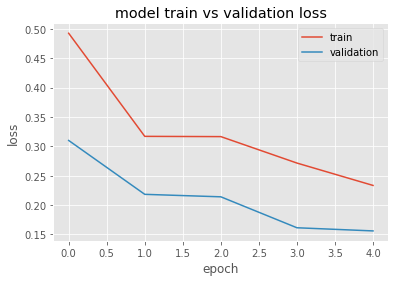

In [47]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [41]:
  model = keras.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=3, kernel_size=4, activation='tanh', 
                    input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(tf.keras.layers.AveragePooling1D(pool_size=4))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mse')
  model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 24, 3)             15        
_________________________________________________________________
average_pooling1d_1 (Average (None, 6, 3)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [42]:
historay = model.fit(X_train,y_train,validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
77/77 [==============================] - 1s 5ms/step - loss: 455.8991 - val_loss: 311.5376
Epoch 2/5
77/77 [==============================] - 0s 3ms/step - loss: 304.5023 - val_loss: 173.5672
Epoch 3/5
77/77 [==============================] - 0s 3ms/step - loss: 171.6354 - val_loss: 90.7901
Epoch 4/5
77/77 [==============================] - 0s 3ms/step - loss: 89.4615 - val_loss: 51.2355
Epoch 5/5
77/77 [==============================] - 0s 3ms/step - loss: 52.4427 - val_loss: 35.6875


In [43]:
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,Y_pred))
r2 = r2_score(y_test,Y_pred)

print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 6.0
R2 Score for Test set: 0.3


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()